In [2]:
# Load the usual suspects:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

# Fiddle with figure settings here:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
# Set the default colour cycle (in case someone changes it...)
from cycler import cycler
cols = plt.get_cmap('tab10').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=cols)

# A simple little 2D matrix plotter, excluding x and y labels.
def plot_2d(m, title=""):
    plt.imshow(m)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

In [3]:
data = pd.read_csv("interval1/200702111400/256500/256507-212_136_45_198.csv")

In [4]:
N = data.shape[0]
t = np.arange(N)

## Plot features

Text(0.5, 1.0, 'Time series of the feature')

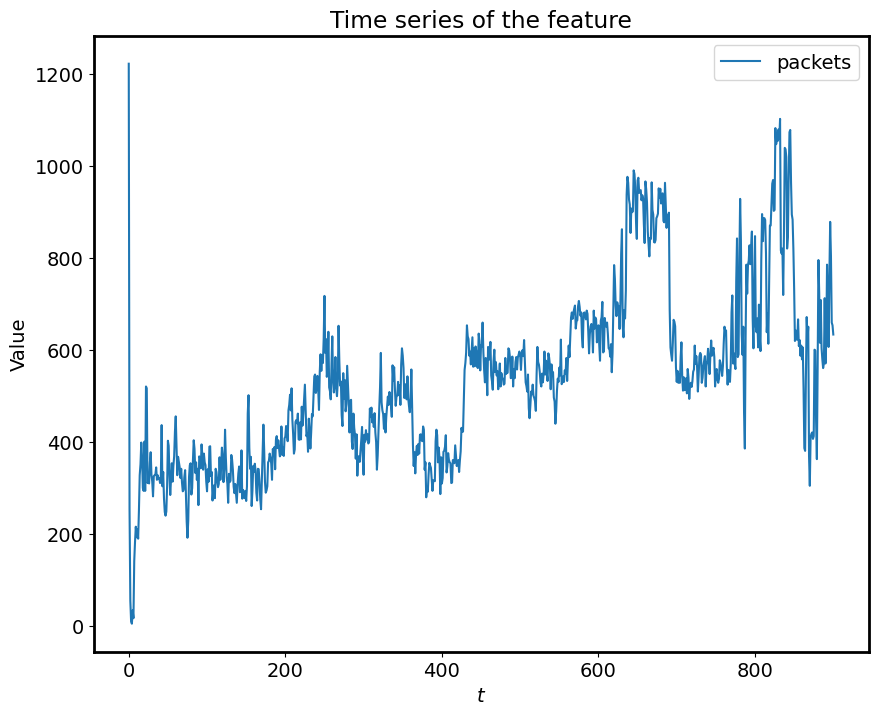

In [15]:
plt.plot(t, data["packets"])
# plt.plot(t, data["bytes"])
# plt.plot(t, data["flows"])
# plt.plot(t, data["packets/flows"])
# plt.plot(t, data["bytes/flows"])
# plt.plot(t, data["bytes/packets"])
# plt.plot(t, data["flows/(bytes/packets)"])
# plt.plot(t, data["nodes"])

plt.legend(["packets"])
plt.xlabel("$t$")
plt.ylabel("Value")
plt.title("Time series of the feature")

Text(0.5, 1.0, 'Time series of the feature')

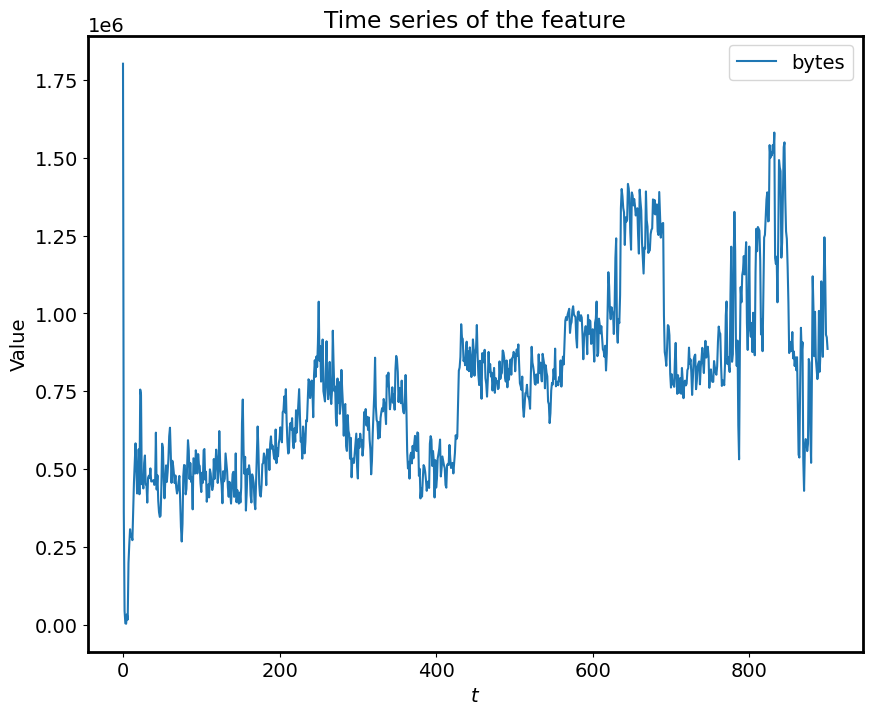

In [16]:
# plt.plot(t, data["packets"])
plt.plot(t, data["bytes"])
# plt.plot(t, data["flows"])
# plt.plot(t, data["packets/flows"])
# plt.plot(t, data["bytes/flows"])
# plt.plot(t, data["bytes/packets"])
# plt.plot(t, data["flows/(bytes/packets)"])
# plt.plot(t, data["nodes"])

plt.legend(["bytes"])
plt.xlabel("$t$")
plt.ylabel("Value")
plt.title("Time series of the feature")

Text(0.5, 1.0, 'Time series of the feature')

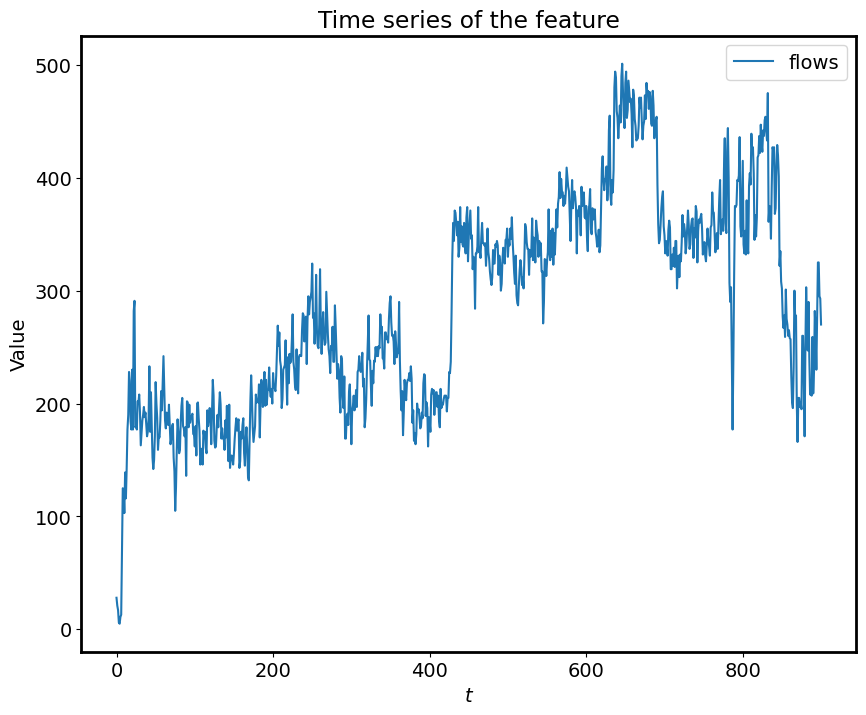

In [17]:
# plt.plot(t, data["packets"])
# plt.plot(t, data["bytes"])
plt.plot(t, data["flows"])
# plt.plot(t, data["packets/flows"])
# plt.plot(t, data["bytes/flows"])
# plt.plot(t, data["bytes/packets"])
# plt.plot(t, data["flows/(bytes/packets)"])
# plt.plot(t, data["nodes"])

plt.legend(["flows"])
plt.xlabel("$t$")
plt.ylabel("Value")
plt.title("Time series of the feature")

Text(0.5, 1.0, 'Time series of the feature')

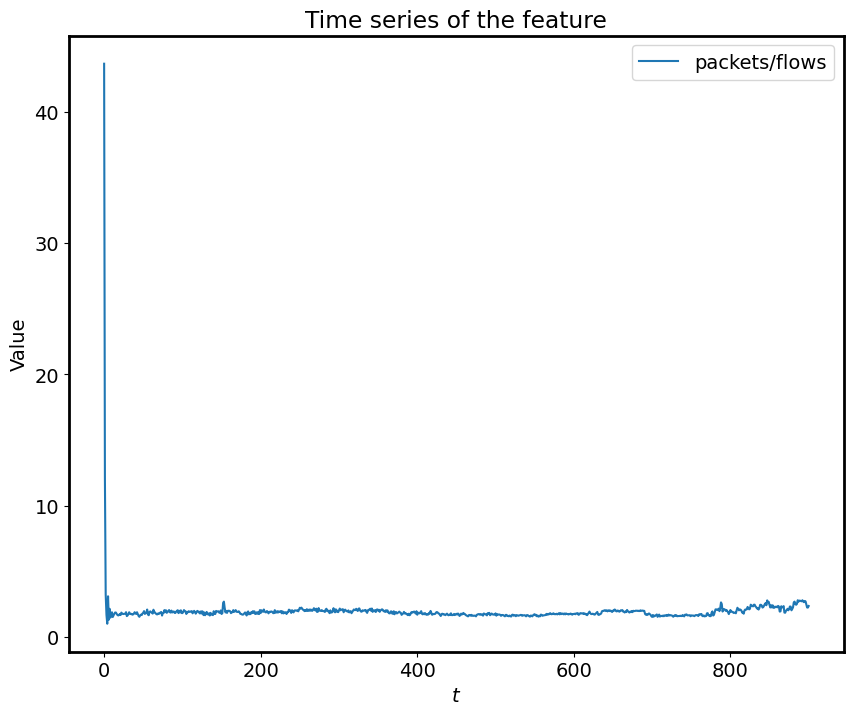

In [18]:
# plt.plot(t, data["packets"])
# plt.plot(t, data["bytes"])
# plt.plot(t, data["flows"])
plt.plot(t, data["packets/flows"])
# plt.plot(t, data["bytes/flows"])
# plt.plot(t, data["bytes/packets"])
# plt.plot(t, data["flows/(bytes/packets)"])
# plt.plot(t, data["nodes"])

plt.legend(["packets/flows"])
plt.xlabel("$t$")
plt.ylabel("Value")
plt.title("Time series of the feature")

Text(0.5, 1.0, 'Time series of the feature')

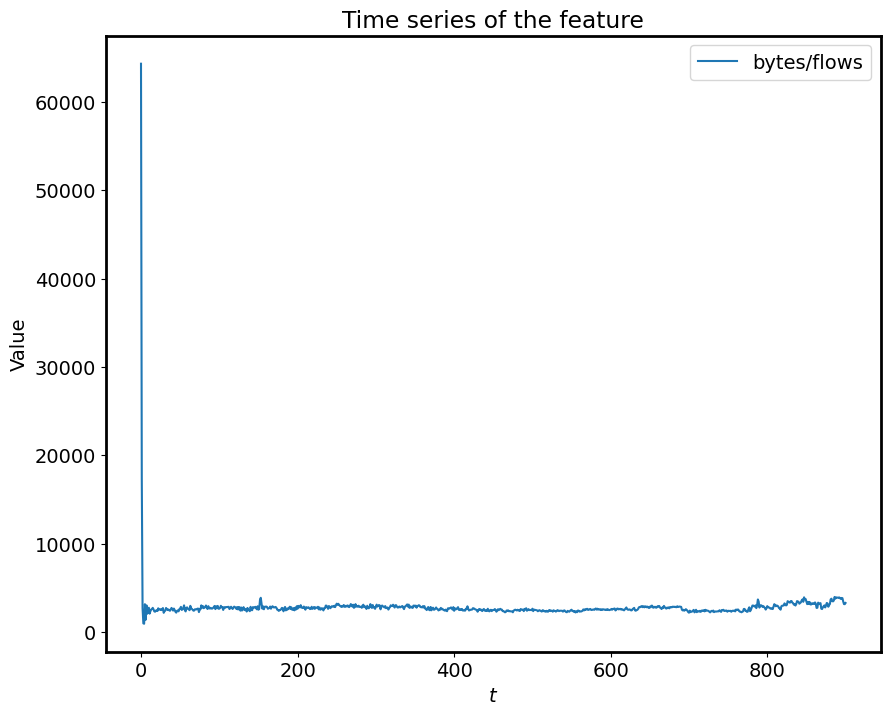

In [19]:
# plt.plot(t, data["packets"])
# plt.plot(t, data["bytes"])
# plt.plot(t, data["flows"])
# plt.plot(t, data["packets/flows"])
plt.plot(t, data["bytes/flows"])
# plt.plot(t, data["bytes/packets"])
# plt.plot(t, data["flows/(bytes/packets)"])
# plt.plot(t, data["nodes"])

plt.legend(["bytes/flows"])
plt.xlabel("$t$")
plt.ylabel("Value")
plt.title("Time series of the feature")

Text(0.5, 1.0, 'Time series of the feature')

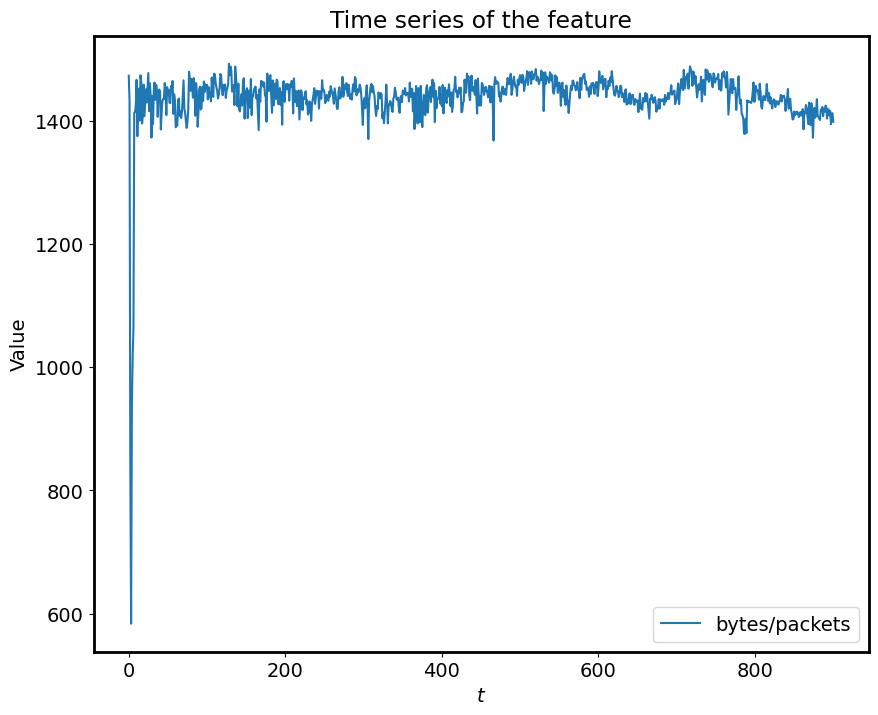

In [20]:
# plt.plot(t, data["packets"])
# plt.plot(t, data["bytes"])
# plt.plot(t, data["flows"])
# plt.plot(t, data["packets/flows"])
# plt.plot(t, data["bytes/flows"])
plt.plot(t, data["bytes/packets"])
# plt.plot(t, data["flows/(bytes/packets)"])
# plt.plot(t, data["nodes"])

plt.legend(["bytes/packets"])
plt.xlabel("$t$")
plt.ylabel("Value")
plt.title("Time series of the feature")

Text(0.5, 1.0, 'Time series of the feature')

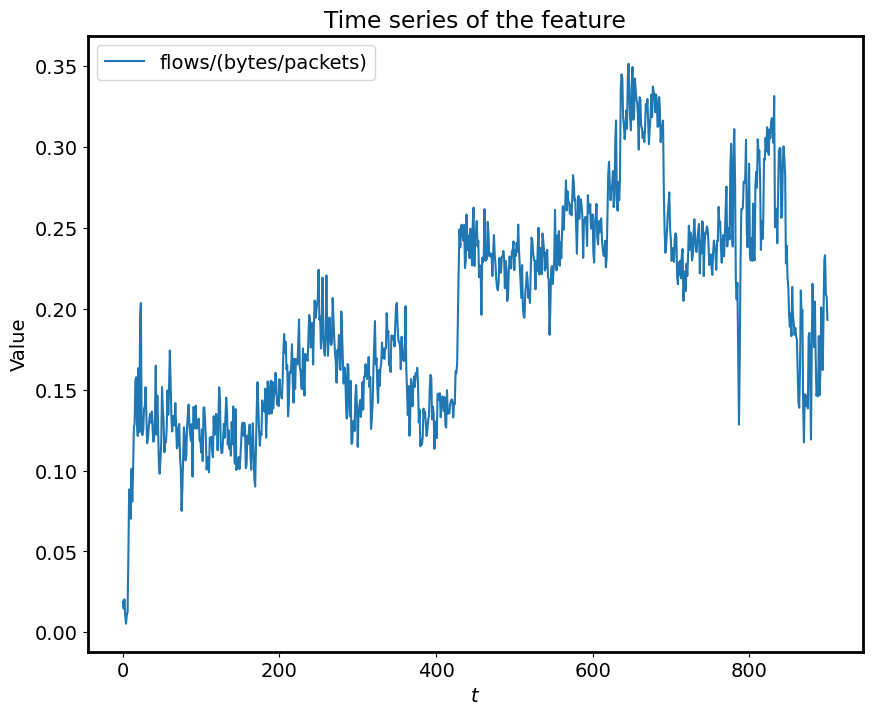

In [21]:
# plt.plot(t, data["packets"])
# plt.plot(t, data["bytes"])
# plt.plot(t, data["flows"])
# plt.plot(t, data["packets/flows"])
# plt.plot(t, data["bytes/flows"])
# plt.plot(t, data["bytes/packets"])
plt.plot(t, data["flows/(bytes/packets)"])
# plt.plot(t, data["nodes"])

plt.legend(["flows/(bytes/packets)"])
plt.xlabel("$t$")
plt.ylabel("Value")
plt.title("Time series of the feature")

Text(0.5, 1.0, 'Time series of the feature')

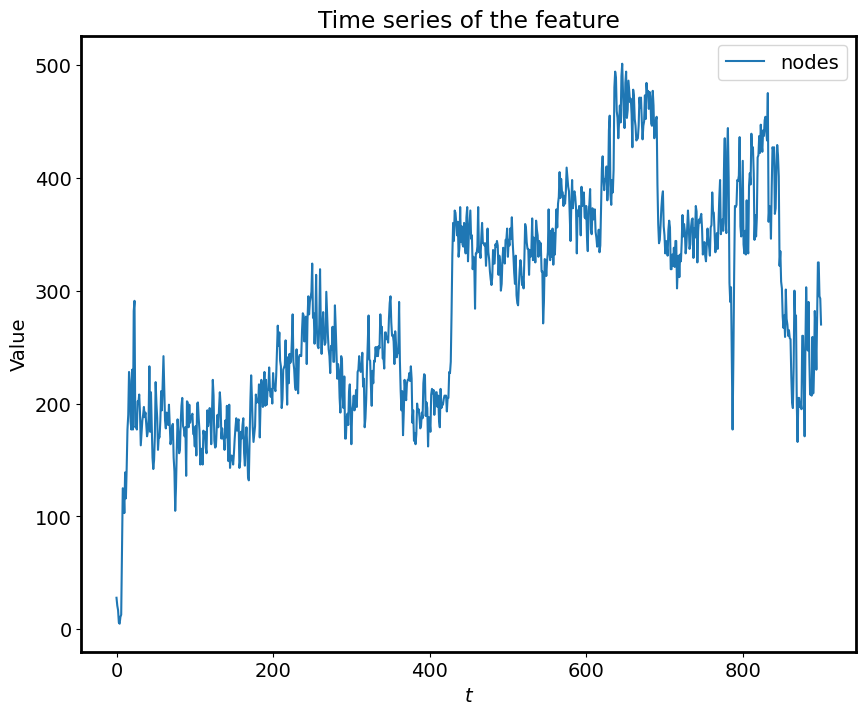

In [22]:
# plt.plot(t, data["packets"])
# plt.plot(t, data["bytes"])
# plt.plot(t, data["flows"])
# plt.plot(t, data["packets/flows"])
# plt.plot(t, data["bytes/flows"])
# plt.plot(t, data["bytes/packets"])
# plt.plot(t, data["flows/(bytes/packets)"])
plt.plot(t, data["nodes"])

plt.legend(["nodes"])
plt.xlabel("$t$")
plt.ylabel("Value")
plt.title("Time series of the feature")

## SSA

### From Time Series to Trajectory Matrix

In [8]:
F = data["packets"]
L = 300
K = N - L + 1
X = np.column_stack([F[i:i+L] for i in range(K)])

Text(0.5, 1.0, 'The Trajectory Matrix for the Toy Time Series')

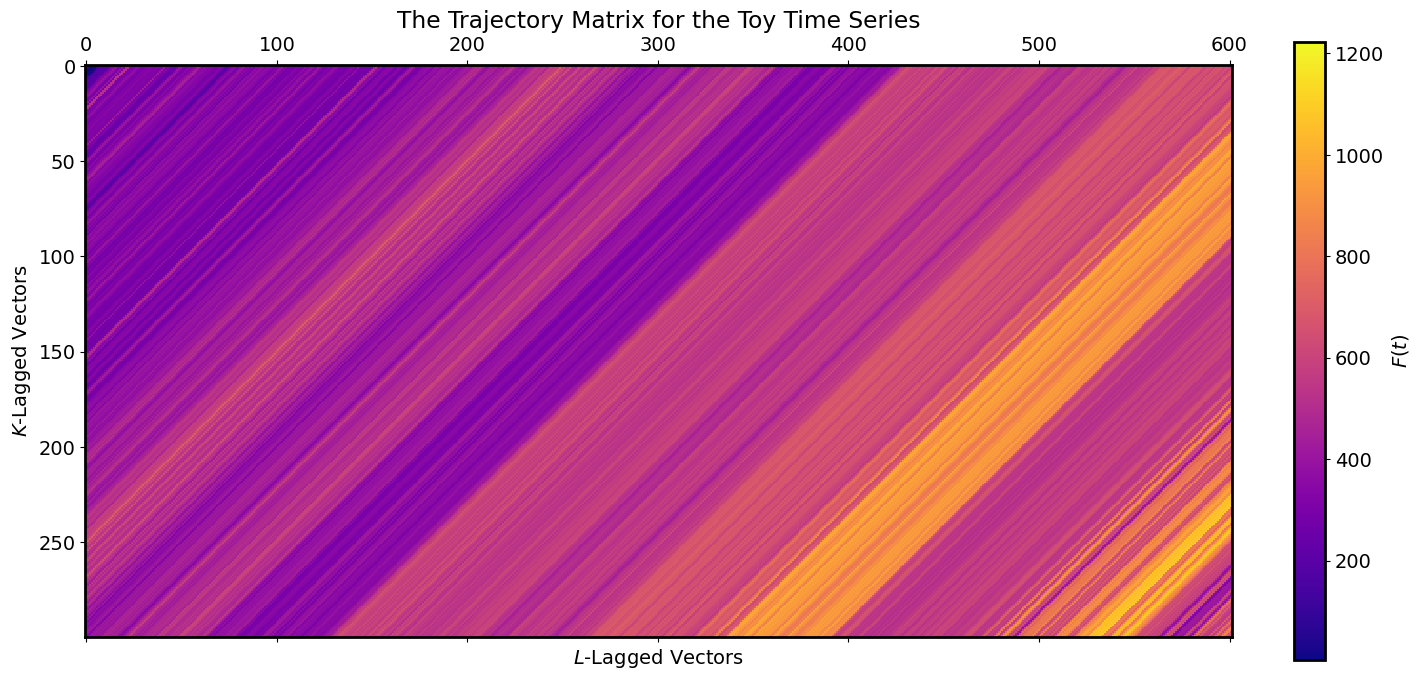

In [41]:
ax = plt.matshow(X)
plt.xlabel("$L$-Lagged Vectors")
plt.ylabel("$K$-Lagged Vectors")
plt.colorbar(ax.colorbar, fraction=0.025)
ax.colorbar.set_label("$F(t)$")
plt.title("The Trajectory Matrix for the Toy Time Series")

### Decomposing the Trajectory Matrix

In [42]:
d = np.linalg.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.

# For those interested in how to code up an SVD calculation, Numerical Recipes in Fortran 77
# has you covered: http://www.aip.de/groups/soe/local/numres/bookfpdf/f2-6.pdf
# Thankfully, we'll leave the actual SVD calculation to NumPy.
U, Sigma, V = np.linalg.svd(X)
V = V.T # Note: the SVD routine returns V^T, not V, so I'll tranpose it back here. This may seem pointless, 
# but I'll treat the Python representation of V consistently with the mathematical notation in this notebook.

# Calculate the elementary matrices of X, storing them in a multidimensional NumPy array.
# This requires calculating sigma_i * U_i * (V_i)^T for each i, or sigma_i * outer_product(U_i, V_i). 
# Note that Sigma is a 1D array of singular values, instead of the full L x K diagonal matrix.
X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )

# Quick sanity check: the sum of all elementary matrices in X_elm should be equal to X, to within a 
# *very small* tolerance:
if not np.allclose(X, X_elem.sum(axis=0), atol=1e-10):
    print("WARNING: The sum of X's elementary matrices is not equal to X!")

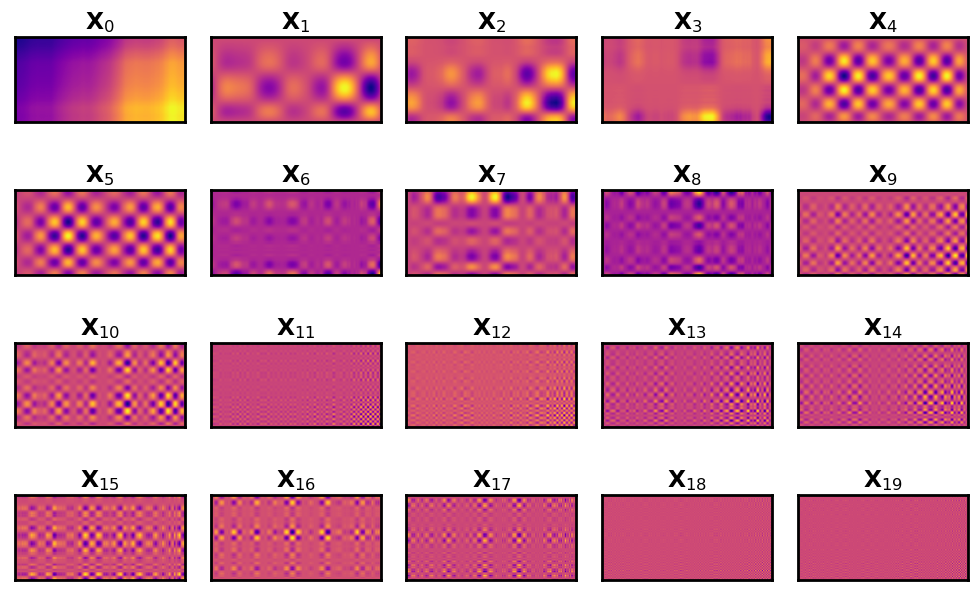

In [62]:
n = min(20, d) # In case d is less than 12 for the toy series. Say, if we were to exclude the noise component...
for i in range(n):
    plt.subplot(n // 5 + 1, 5, i + 1)
    title = "$\mathbf{X}_{" + str(i) + "}$"
    plot_2d(X_elem[i], title)
plt.tight_layout()

Text(0, 0.5, 'Contribution (%)')

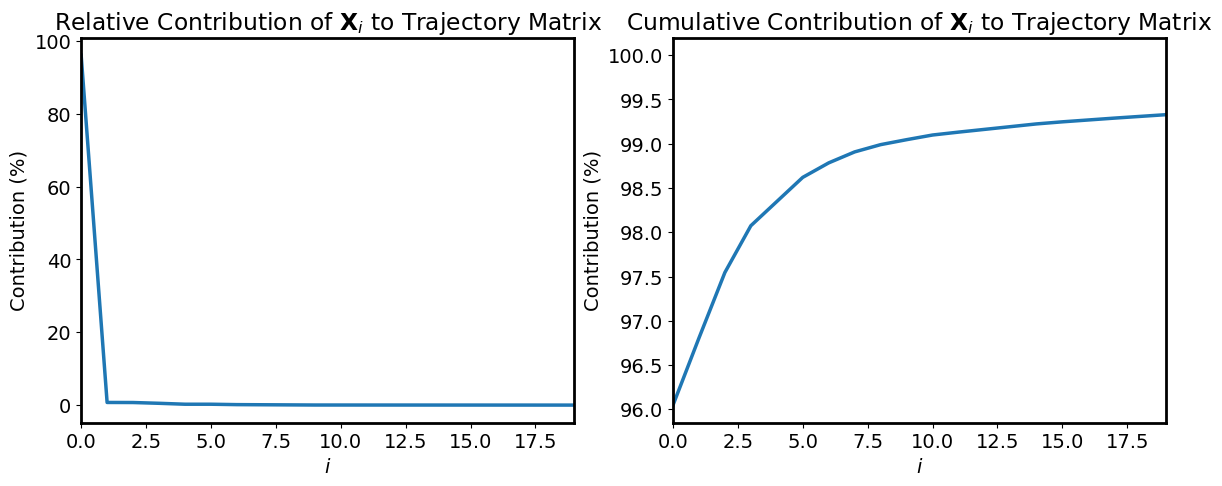

In [63]:
sigma_sumsq = (Sigma**2).sum()
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].plot(Sigma**2 / sigma_sumsq * 100, lw=2.5)
ax[0].set_xlim(0,19)
ax[0].set_title("Relative Contribution of $\mathbf{X}_i$ to Trajectory Matrix")
ax[0].set_xlabel("$i$")
ax[0].set_ylabel("Contribution (%)")
ax[1].plot((Sigma**2).cumsum() / sigma_sumsq * 100, lw=2.5)
ax[1].set_xlim(0,19)
ax[1].set_title("Cumulative Contribution of $\mathbf{X}_i$ to Trajectory Matrix")
ax[1].set_xlabel("$i$")
ax[1].set_ylabel("Contribution (%)")

### Reconstructing the Time Series

In [51]:
def Hankelise(X):
    """
    Hankelises the matrix X, returning H(X).
    """
    L, K = X.shape
    transpose = False
    if L > K:
        # The Hankelisation below only works for matrices where L < K.
        # To Hankelise a L > K matrix, first swap L and K and tranpose X.
        # Set flag for HX to be transposed before returning. 
        X = X.T
        L, K = K, L
        transpose = True

    HX = np.zeros((L,K))
    
    # I know this isn't very efficient...
    for m in range(L):
        for n in range(K):
            s = m+n
            if 0 <= s <= L-1:
                for l in range(0,s+1):
                    HX[m,n] += 1/(s+1)*X[l, s-l]    
            elif L <= s <= K-1:
                for l in range(0,L-1):
                    HX[m,n] += 1/(L-1)*X[l, s-l]
            elif K <= s <= K+L-2:
                for l in range(s-K+1,L):
                    HX[m,n] += 1/(K+L-s-1)*X[l, s-l]
    if transpose:
        return HX.T
    else:
        return HX

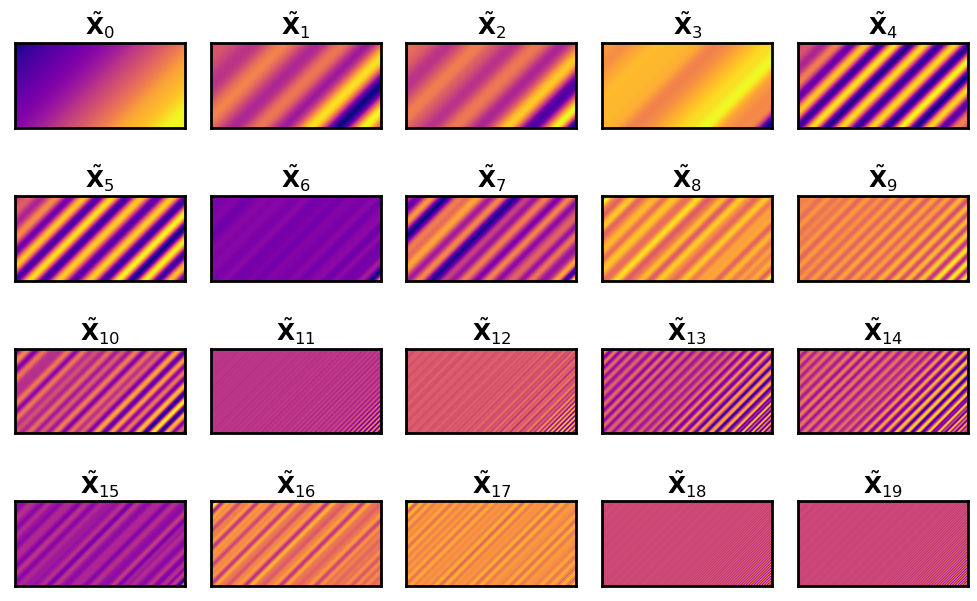

In [65]:
n = min(d, 20)
for j in range(0,n):
    plt.subplot(n // 5 + 1, 5, j + 1)
    title = r"$\tilde{\mathbf{X}}_{" + str(j) + "}$"
    plot_2d(Hankelise(X_elem[j]), title)
plt.tight_layout()

In [66]:
def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

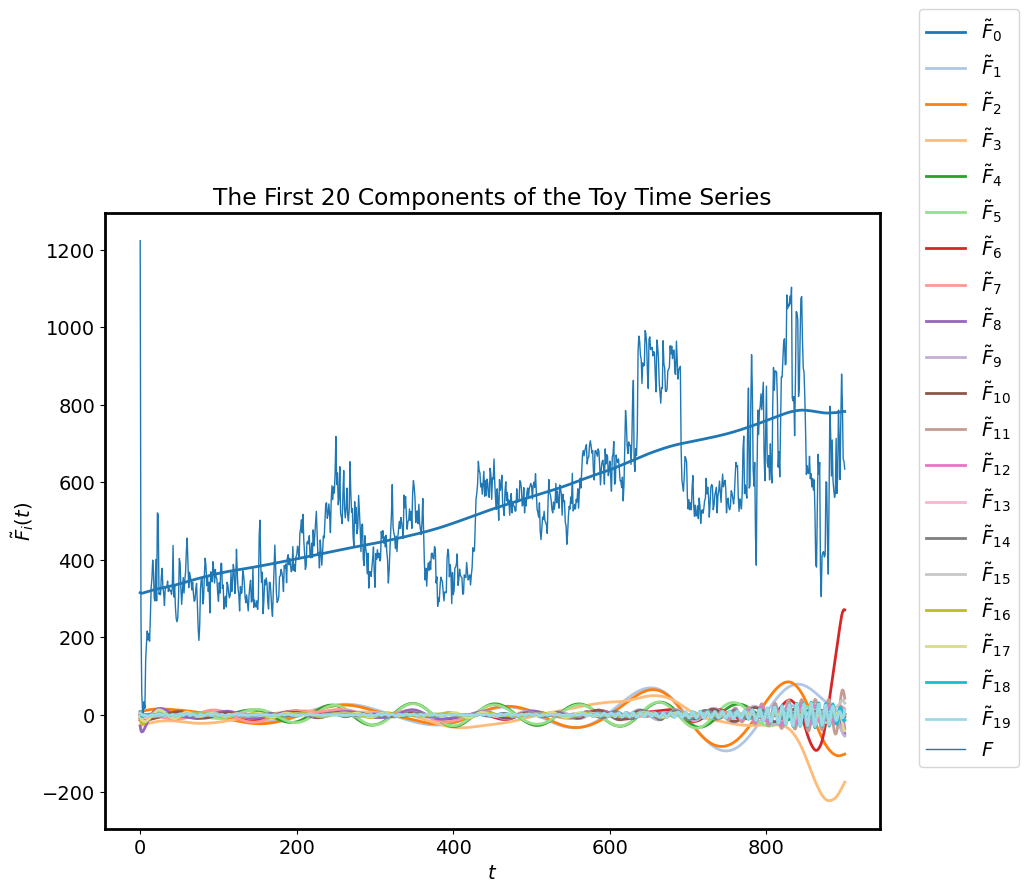

In [71]:
n = min(20,d) # In case of noiseless time series with d < 12.

# Fiddle with colour cycle - need more colours!
fig = plt.subplot()
color_cycle = cycler(color=plt.get_cmap('tab20').colors)
fig.axes.set_prop_cycle(color_cycle)

# Convert elementary matrices straight to a time series - no need to construct any Hankel matrices.
for i in range(n):
    F_i = X_to_TS(X_elem[i])
    fig.axes.plot(t, F_i, lw=2)

fig.axes.plot(t, F, alpha=1, lw=1)
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)] + ["$F$"]
fig.set_title("The First 20 Components of the Toy Time Series")
fig.legend(legend, loc=(1.05,0.1))

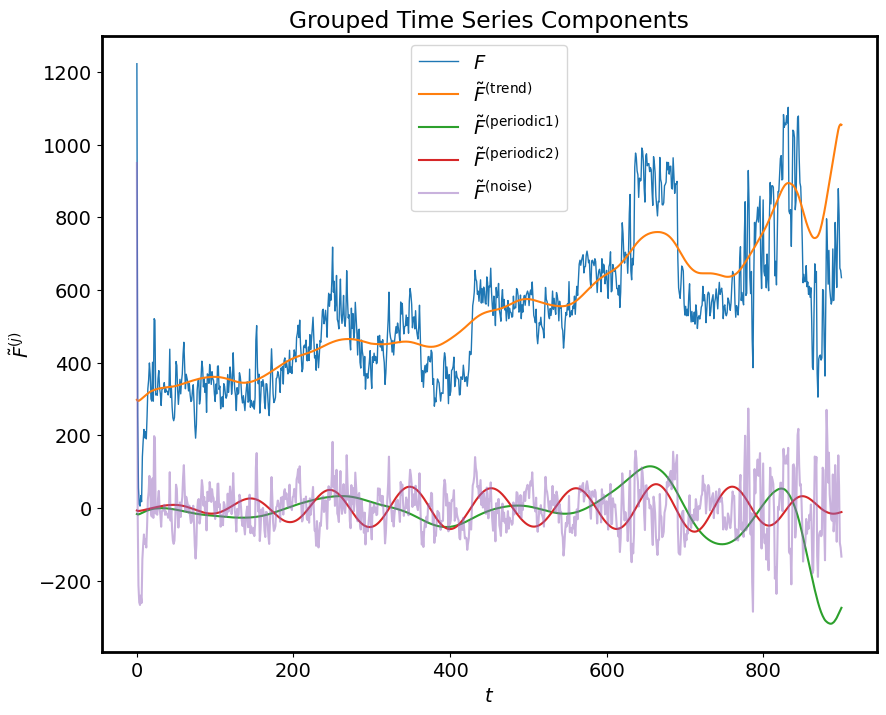

NameError: name 'trend' is not defined

In [72]:
# Assemble the grouped components of the time series.
F_trend = X_to_TS(X_elem[[0,1,6]].sum(axis=0))
F_periodic1 = X_to_TS(X_elem[[2,3]].sum(axis=0))
F_periodic2 = X_to_TS(X_elem[[4,5]].sum(axis=0))
F_noise = X_to_TS(X_elem[7:].sum(axis=0))

# Plot the toy time series and its separated components on a single plot.
plt.plot(t,F, lw=1)
plt.plot(t, F_trend)
plt.plot(t, F_periodic1)
plt.plot(t, F_periodic2)
plt.plot(t, F_noise, alpha=0.5)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}^{(j)}$")
groups = ["trend", "periodic 1", "periodic 2", "noise"]
legend = ["$F$"] + [r"$\tilde{F}^{(\mathrm{%s})}$"%group for group in groups]
plt.legend(legend)
plt.title("Grouped Time Series Components")
plt.show()

# A list of tuples so we can create the next plot with a loop.
components = [("Trend", trend, F_trend), 
              ("Periodic 1", periodic1, F_periodic1),
              ("Periodic 2", periodic2, F_periodic2),
              ("Noise", noise, F_noise)]

# Plot the separated components and original components together.
fig = plt.figure()
n=1
for name, orig_comp, ssa_comp in components:
    ax = fig.add_subplot(2,2,n)
    ax.plot(t, orig_comp, linestyle="--", lw=2.5, alpha=0.7)
    ax.plot(t, ssa_comp)
    ax.set_title(name, fontsize=16)
    ax.set_xticks([])
    n += 1

fig.tight_layout()

## Time Series Component Separation and Grouping

In [73]:
# Get the weights w first, as they'll be reused a lot.
# Note: list(np.arange(L)+1) returns the sequence 1 to L (first line in definition of w), 
# [L]*(K-L-1) repeats L K-L-1 times (second line in w definition)
# list(np.arange(L)+1)[::-1] reverses the first list (equivalent to the third line)
# Add all the lists together and we have our array of weights.
w = np.array(list(np.arange(L)+1) + [L]*(K-L-1) + list(np.arange(L)+1)[::-1])

# Get all the components of the toy series, store them as columns in F_elem array.
F_elem = np.array([X_to_TS(X_elem[i]) for i in range(d)])

# Calculate the individual weighted norms, ||F_i||_w, first, then take inverse square-root so we don't have to later.
F_wnorms = np.array([w.dot(F_elem[i]**2) for i in range(d)])
F_wnorms = F_wnorms**-0.5

# Calculate the w-corr matrix. The diagonal elements are equal to 1, so we can start with an identity matrix
# and iterate over all pairs of i's and j's (i != j), noting that Wij = Wji.
Wcorr = np.identity(d)
for i in range(d):
    for j in range(i+1,d):
        Wcorr[i,j] = abs(w.dot(F_elem[i]*F_elem[j]) * F_wnorms[i] * F_wnorms[j])
        Wcorr[j,i] = Wcorr[i,j]

Text(0.5, 1.0, 'The W-Correlation Matrix for the Toy Time Series')

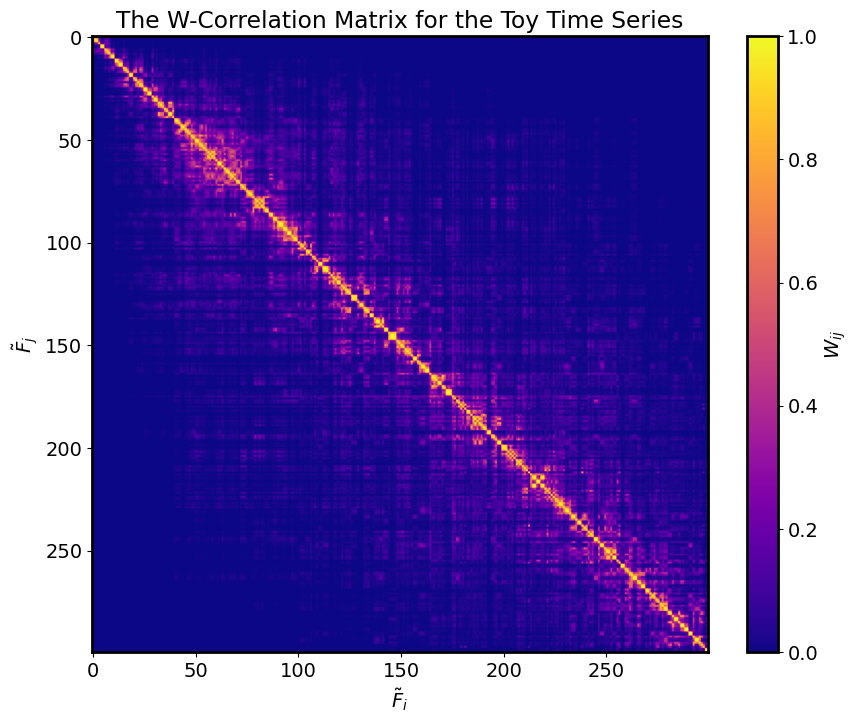

In [74]:
ax = plt.imshow(Wcorr)
plt.xlabel(r"$\tilde{F}_i$")
plt.ylabel(r"$\tilde{F}_j$")
plt.colorbar(ax.colorbar, fraction=0.045)
ax.colorbar.set_label("$W_{ij}$")
plt.clim(0,1)
plt.title("The W-Correlation Matrix for the Toy Time Series")

## A Python Class for SSA

In [6]:
class SSA(object):
    
    __supported_types = (pd.Series, np.ndarray, list)
    
    def __init__(self, tseries, L, save_mem=True):
        """
        Decomposes the given time series with a singular-spectrum analysis. Assumes the values of the time series are
        recorded at equal intervals.
        
        Parameters
        ----------
        tseries : The original time series, in the form of a Pandas Series, NumPy array or list. 
        L : The window length. Must be an integer 2 <= L <= N/2, where N is the length of the time series.
        save_mem : Conserve memory by not retaining the elementary matrices. Recommended for long time series with
            thousands of values. Defaults to True.
        
        Note: Even if an NumPy array or list is used for the initial time series, all time series returned will be
        in the form of a Pandas Series or DataFrame object.
        """
        
        # Tedious type-checking for the initial time series
        if not isinstance(tseries, self.__supported_types):
            raise TypeError("Unsupported time series object. Try Pandas Series, NumPy array or list.")
        
        # Checks to save us from ourselves
        self.N = len(tseries)
        if not 2 <= L <= self.N/2:
            raise ValueError("The window length must be in the interval [2, N/2].")
        
        self.L = L
        self.orig_TS = pd.Series(tseries)
        self.K = self.N - self.L + 1
        
        # Embed the time series in a trajectory matrix
        self.X = np.array([self.orig_TS.values[i:L+i] for i in range(0, self.K)]).T
        
        # Decompose the trajectory matrix
        self.U, self.Sigma, VT = np.linalg.svd(self.X)
        self.d = np.linalg.matrix_rank(self.X)
        
        self.TS_comps = np.zeros((self.N, self.d))
        
        if not save_mem:
            # Construct and save all the elementary matrices
            self.X_elem = np.array([ self.Sigma[i]*np.outer(self.U[:,i], VT[i,:]) for i in range(self.d) ])

            # Diagonally average the elementary matrices, store them as columns in array.           
            for i in range(self.d):
                X_rev = self.X_elem[i, ::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.V = VT.T
        else:
            # Reconstruct the elementary matrices without storing them
            for i in range(self.d):
                X_elem = self.Sigma[i]*np.outer(self.U[:,i], VT[i,:])
                X_rev = X_elem[::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.X_elem = "Re-run with save_mem=False to retain the elementary matrices."
            
            # The V array may also be very large under these circumstances, so we won't keep it.
            self.V = "Re-run with save_mem=False to retain the V matrix."
        
        # Calculate the w-correlation matrix.
        self.calc_wcorr()
            
    def components_to_df(self, n=0):
        """
        Returns all the time series components in a single Pandas DataFrame object.
        """
        if n > 0:
            n = min(n, self.d)
        else:
            n = self.d
        
        # Create list of columns - call them F0, F1, F2, ...
        cols = ["F{}".format(i) for i in range(n)]
        return pd.DataFrame(self.TS_comps[:, :n], columns=cols, index=self.orig_TS.index)
            
    
    def reconstruct(self, indices):
        """
        Reconstructs the time series from its elementary components, using the given indices. Returns a Pandas Series
        object with the reconstructed time series.
        
        Parameters
        ----------
        indices: An integer, list of integers or slice(n,m) object, representing the elementary components to sum.
        """
        if isinstance(indices, int): indices = [indices]
        
        ts_vals = self.TS_comps[:,indices].sum(axis=1)
        return pd.Series(ts_vals, index=self.orig_TS.index)
    
    def calc_wcorr(self):
        """
        Calculates the w-correlation matrix for the time series.
        """
             
        # Calculate the weights
        w = np.array(list(np.arange(self.L)+1) + [self.L]*(self.K-self.L-1) + list(np.arange(self.L)+1)[::-1])
        
        def w_inner(F_i, F_j):
            return w.dot(F_i*F_j)
        
        # Calculated weighted norms, ||F_i||_w, then invert.
        F_wnorms = np.array([w_inner(self.TS_comps[:,i], self.TS_comps[:,i]) for i in range(self.d)])
        F_wnorms = F_wnorms**-0.5
        
        # Calculate Wcorr.
        self.Wcorr = np.identity(self.d)
        for i in range(self.d):
            for j in range(i+1,self.d):
                self.Wcorr[i,j] = abs(w_inner(self.TS_comps[:,i], self.TS_comps[:,j]) * F_wnorms[i] * F_wnorms[j])
                self.Wcorr[j,i] = self.Wcorr[i,j]
    
    def plot_wcorr(self, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.d
        
        if self.Wcorr is None:
            self.calc_wcorr()
        
        ax = plt.imshow(self.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)
        
        # For plotting purposes:
        if max == self.d:
            max_rnge = self.d-1
        else:
            max_rnge = max
        
        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)

## The Window Length

Text(0.5, 1.0, '$L$ for the Toy Time Series')

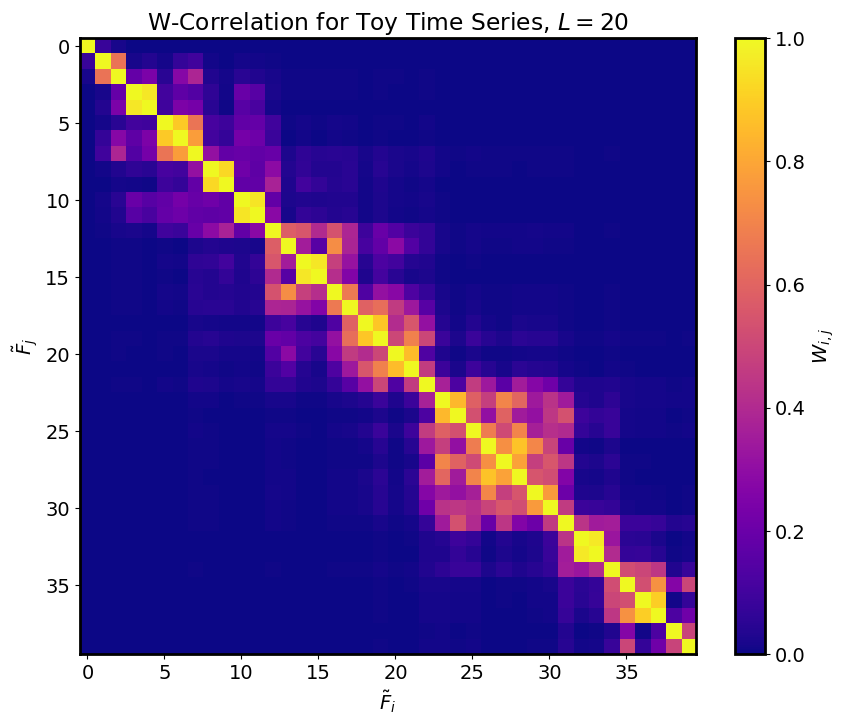

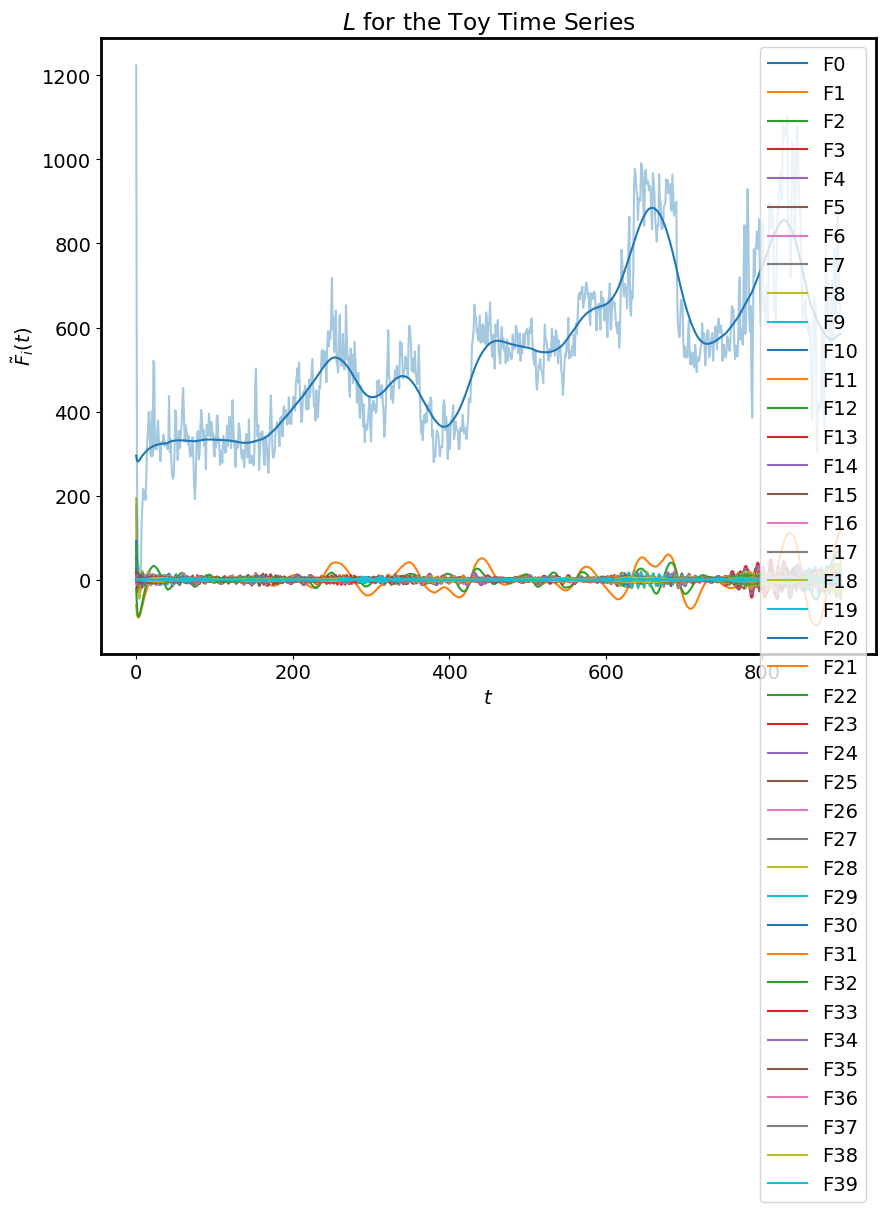

In [9]:
F_ssa_L = SSA(F, 40)
F_ssa_L.plot_wcorr()
plt.title("W-Correlation for Toy Time Series, $L=20$")
F_ssa_L.components_to_df().plot()
F_ssa_L.orig_TS.plot(alpha=0.4)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title(r"$L$ for the Toy Time Series")

In [11]:
Fs = F_ssa_L.components_to_df()

In [18]:
import nolds

nolds.hurst_rs(Fs['F6'])

c:\Users\pcdea\AppData\Local\Programs\Python\Python311\Lib\site-packages\nolds\measures.py:25: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  warnings.warn(


0.519178659409394

## Real things

In [83]:
F = data["packets"]
L = 350
K = N - L + 1
X = np.column_stack([F[i:i+L] for i in range(K)])

In [84]:
F_ssa = SSA(F, L)

Text(0.5, 1.0, 'W-Correlation for Packets, $L=350$')

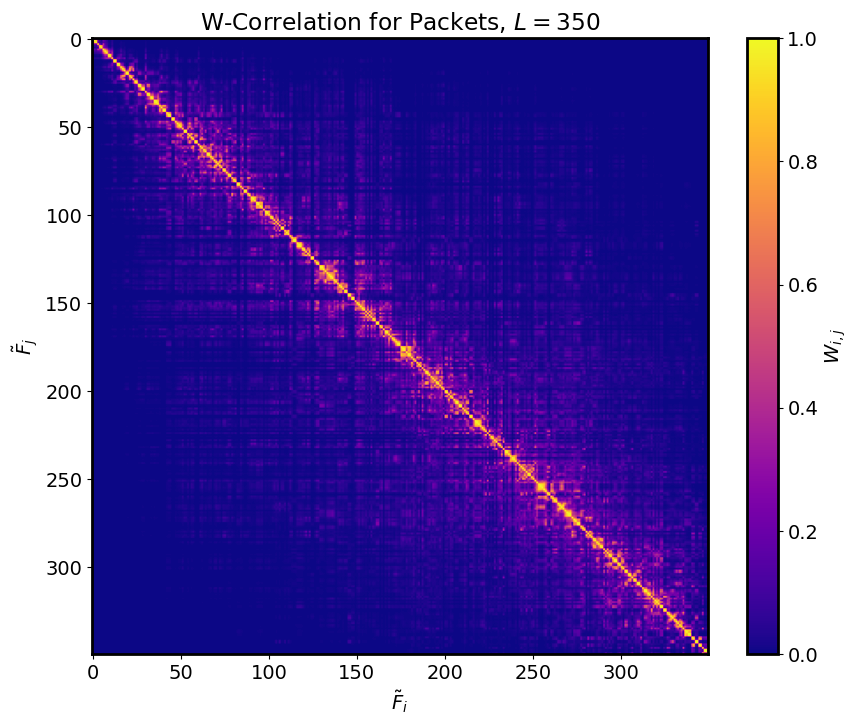

In [85]:
F_ssa.plot_wcorr()
plt.title("W-Correlation for Packets, $L=350$")

Text(0.5, 1.0, 'W-Correlation for Packets, $L=350$, $i,j<50$')

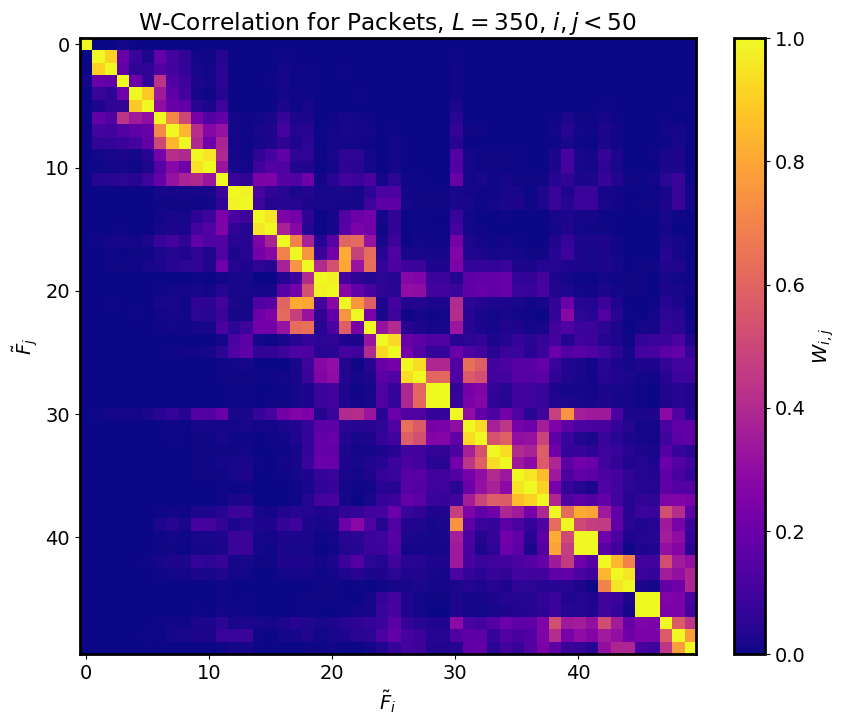

In [86]:
F_ssa.plot_wcorr(max=49)
plt.title("W-Correlation for Packets, $L=350$, $i,j<50$")

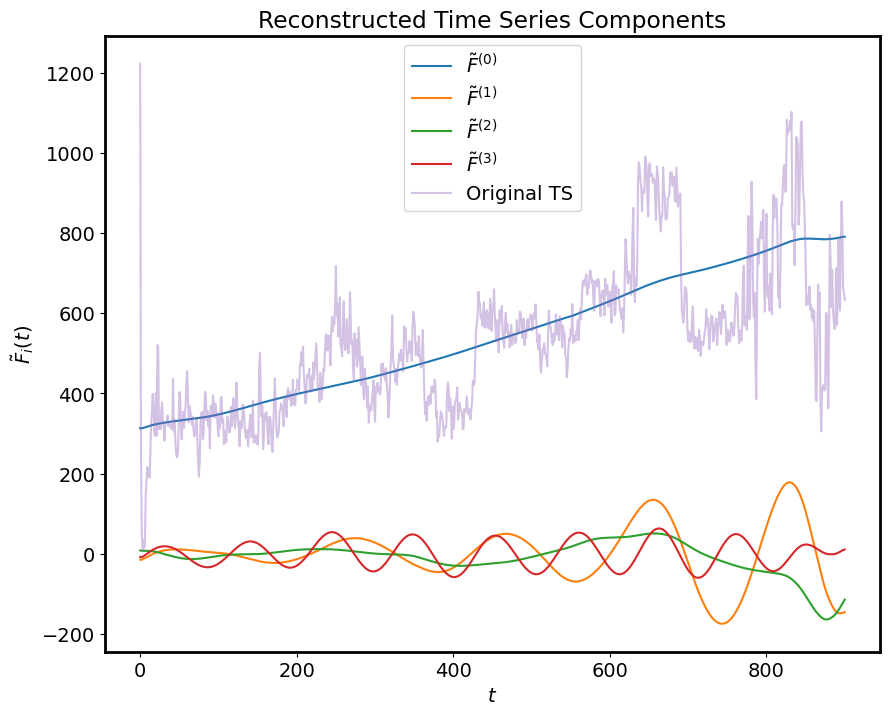

In [102]:
F_ssa.reconstruct(0).plot()
F_ssa.reconstruct([1,2]).plot()
F_ssa.reconstruct([3]).plot()
F_ssa.reconstruct([4,5]).plot()
F_ssa.orig_TS.plot(alpha=0.4)
plt.title("Reconstructed Time Series Components")
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
legend = [
    r"$\tilde{{F}}^{{({0})}}$".format(i)
    for i in range(4)
] + ["Original TS"]
plt.legend(legend)

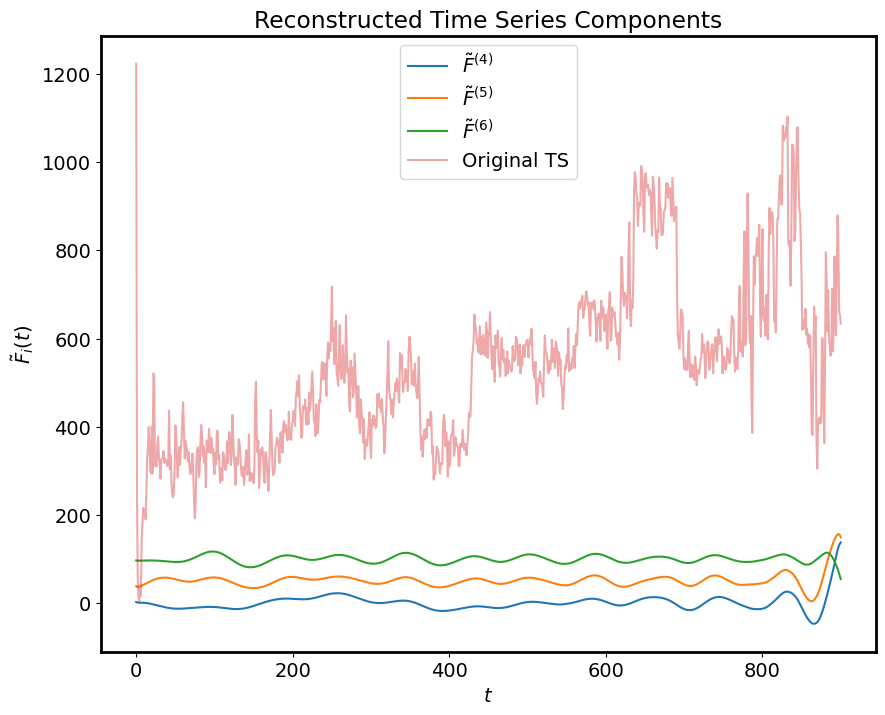

In [111]:
F_ssa.reconstruct([6]).plot()
(F_ssa.reconstruct([7]) + 50).plot()
(F_ssa.reconstruct([8]) + 100).plot()
F_ssa.orig_TS.plot(alpha=0.4)
plt.title("Reconstructed Time Series Components")
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
legend = [
    r"$\tilde{{F}}^{{({0})}}$".format(i)
    for i in range(4, 7)
] + ["Original TS"]
plt.legend(legend)